In [1]:
# download dataset from https://www.kaggle.com/c/digit-recognizer/data

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

In [121]:
DATA_PATH = '../digit-recognizer'
FILE_NAME = 'train.csv'
d0 = pd.read_csv(os.path.join(DATA_PATH, FILE_NAME))

In [122]:
d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
label = d0['label']
features = d0.drop('label', axis=1)

In [124]:
# label is a series type
label[:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [125]:
# features is a dataframe type
features.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
print(label.shape)
print(features.shape)

(42000,)
(42000, 784)


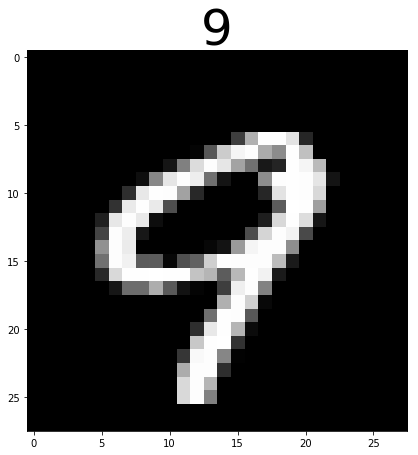

In [127]:
# visualising the nth datapoint
n = 100

plt.figure(figsize = (7,7))
plt.title(label[n], loc='center', fontsize='50')
grid_data = np.array(features.iloc[n])
grid_data = grid_data.reshape(28, 28)
plt.imshow(grid_data, cmap = 'gray')
plt.show()

In [131]:
# Dimentionality Reduction
from sklearn.preprocessing import StandardScaler

In [132]:
standardised_features = StandardScaler().fit_transform(features)
print('Shape of standardised features : {}'.format(standardised_features.shape))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Shape of standardised features : (42000, 784)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [167]:
# Pickle them:
import pickle 
pickle_out = open("standardised_features.pickle", "wb")
pickle.dump(standardised_features, pickle_out)
pickle_out.close()
pickle_out = open("label.pickle", "wb")
pickle.dump(label, pickle_out)
pickle_out.close()

In [133]:
# Find the covarience matrix
# simply : covar = A^T * A
covar = np.matmul(standardised_features.T, standardised_features)
print('Shape of covarience Matrix : {}'.format(covar.shape))

Shape of covarience Matrix : (784, 784)


In [59]:
# Finding the eigen values and their corresponding eigen vectors
# top eigen values are the top features with top variance
# top eigen values are the features which are more important for classification

from scipy.linalg import eigh
top_features = 2
all_features = features.shape[1]
# [::-1] is to reverse the list
# first converted to a list from the last and then converted it to tuple to feed in eigh

eigvals = tuple([(all_features-i-1) for i in range(top_features)][::-1])
print(eigvals)
values, vectors = eigh(covar, eigvals=eigvals)

(782, 783)


In [60]:
# print the shape of vectors
#vectors = vectors.T
print('Shape of eigen vectors is {}'.format(vectors.shape))

Shape of eigen vectors is (784, 2)


In [61]:
print(vectors)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [73]:
# New coordinates = eigen_Vectors * sample_data 
# transpose one of them fo correct multiplication
print('Old', standardised_features.shape)
print('Old', vectors.shape)
new_coordinates = np.matmul(vectors.T, standardised_features.T)
print('New', new_coordinates.shape)


Old (42000, 784)
Old (784, 2)
New (2, 42000)


In [76]:
df = pd.DataFrame(data=new_coordinates.T, columns=('1st Principle', '2nd Principle'))
df.head(5)

,1st Principle,2nd Principle
0,-5.226445,-5.140478
1,6.032996,19.292332
2,-1.705813,-7.644503
3,5.836139,-0.474207
4,6.024818,26.559574


In [81]:
df['label'] = label.values
df.head(5)

,1st Principle,2nd Principle,label
0,-5.226445,-5.140478,1
1,6.032996,19.292332,0
2,-1.705813,-7.644503,1
3,5.836139,-0.474207,4
4,6.024818,26.559574,0


In [136]:
import seaborn as sns


In [168]:
standardised_features = pickle.load(open("standardised_features.pickle", "rb"))
label = pickle.load(open("label.pickle", "rb"))

In [169]:
# using scikit learn
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardised_features)
print('Shape of PCA transform : ', pca_data.shape)

Shape of PCA transform :  (42000, 2)


In [170]:
df2 = pd.DataFrame(data=pca_data, columns=('1st Principle', '2nd Principle'))
df2['label'] = label.values
df2.head(5)

,1st Principle,2nd Principle,label
0,-5.140486,-5.226723,1
1,19.292326,6.032698,0
2,-7.644512,-1.705517,1
3,-0.474189,5.836111,4
4,26.559567,6.024749,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


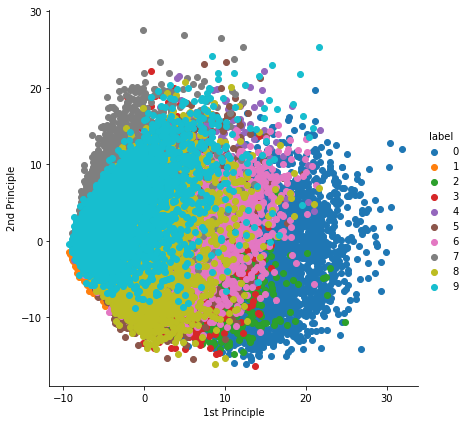

In [171]:
sns.FacetGrid(df2, hue='label', size=6).map(plt.scatter, '1st Principle', '2nd Principle').add_legend()

In [99]:
# Real Dimentionality reduction
# What percentage of information/variance is covered by principle components/ features

# using scikit learn
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 784
pca_data = pca.fit_transform(standardised_features)
print('Shape of PCA transform : ', pca_data.shape)


Shape of PCA transform :  (42000, 784)


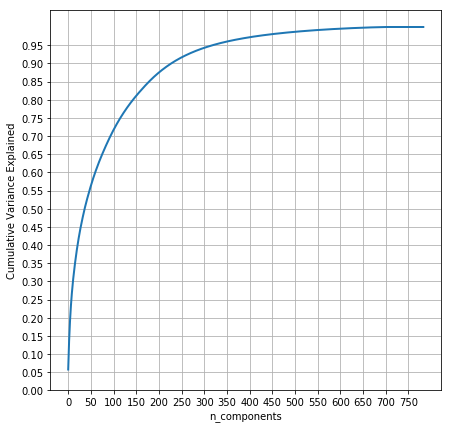

In [118]:
percentage_variance_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_variance_explained = np.cumsum(percentage_variance_explained)
plt.figure(figsize=(7,7))
plt.plot(cumulative_variance_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.yticks(np.arange(0.0,1.0, step = 0.05))
plt.xticks(np.arange(0,784, step = 50))
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [119]:
'''The above plot shows that 350 components are enough for more than 95% of the variance explained so we can get rid of 434 dimentions and keep 500 principle components'''

'The above plot shows that 350 components are enough for more than 95% of the variance explained so we can get rid of 434 dimentions and keep 500 principle components'

In [135]:
print(standardised_features.shape)
standardised_features_1000 = standardised_features[:1000]
standardised_labels_1000 = label[:1000]
print(standardised_features_1000.shape)
print(standardised_labels_1000.shape)


(42000, 784)
(1000, 784)
(1000,)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Time Elapsed 12.001136064529419 seconds


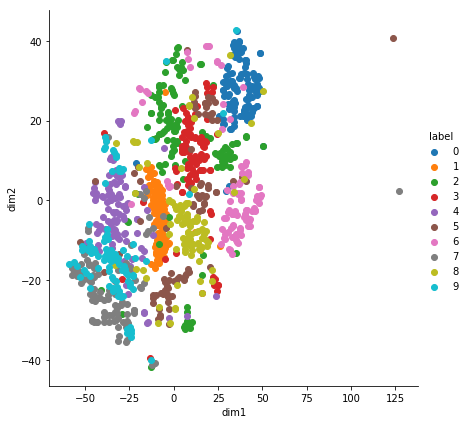

In [142]:
from sklearn.manifold import TSNE
# perplexity is 30 by default
t0 = time.time()
model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(standardised_features_1000)

tsne_df = pd.DataFrame(data=tsne_data, columns=('dim1', 'dim2'))
tsne_df['label'] = label
sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
print('Time Elapsed {} seconds'.format(time.time()-t0))

In [139]:
tsne_df.head()

,dim1,dim2,label
0,-13.414053,6.026344,1
1,30.697248,33.701019,0
2,-6.346874,-11.904454,1
3,-29.591347,19.908476,4
4,36.923126,39.756771,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Time Elapsed 16.83037567138672 seconds


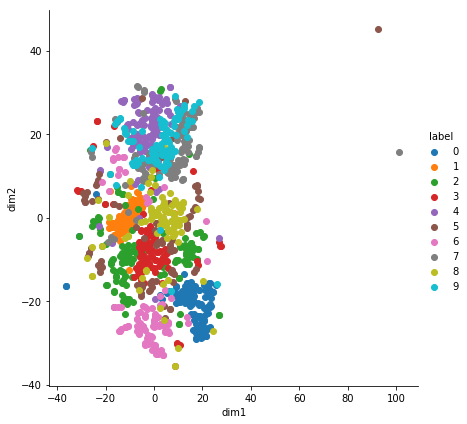

In [143]:
# change preplexity
t0 = time.time()
model = TSNE(n_components=2, random_state=0, perplexity=60)
tsne_data = model.fit_transform(standardised_features_1000)

tsne_df = pd.DataFrame(data=tsne_data, columns=('dim1', 'dim2'))
tsne_df['label'] = label
sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
print('Time Elapsed {} seconds'.format(time.time()-t0))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Time Elapsed 18.510182857513428 seconds


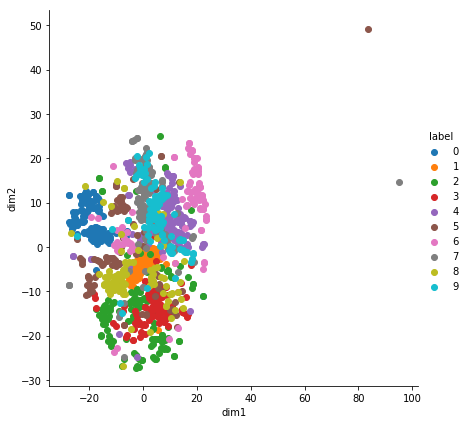

In [144]:
# change preplexity
t0 = time.time()
model = TSNE(n_components=2, random_state=0, perplexity=80)
tsne_data = model.fit_transform(standardised_features_1000)

tsne_df = pd.DataFrame(data=tsne_data, columns=('dim1', 'dim2'))
tsne_df['label'] = label
sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
print('Time Elapsed {} seconds'.format(time.time()-t0))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Time Elapsed 9.365644216537476 seconds


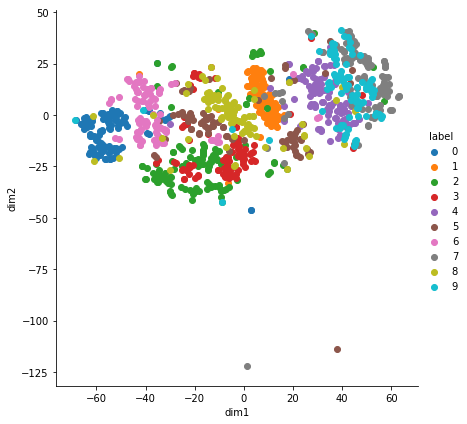

In [145]:
# change preplexity
t0 = time.time()
model = TSNE(n_components=2, random_state=0, perplexity=20)
tsne_data = model.fit_transform(standardised_features_1000)

tsne_df = pd.DataFrame(data=tsne_data, columns=('dim1', 'dim2'))
tsne_df['label'] = label
sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
print('Time Elapsed {} seconds'.format(time.time()-t0))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Time Elapsed 17.372605323791504 seconds


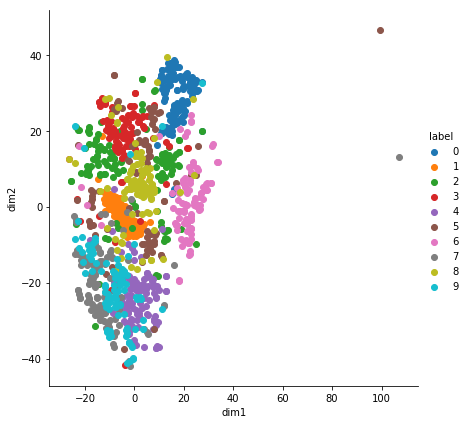

In [146]:
# change preplexity
t0 = time.time()
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(standardised_features_1000)

tsne_df = pd.DataFrame(data=tsne_data, columns=('dim1', 'dim2'))
tsne_df['label'] = label
sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
print('Time Elapsed {} seconds'.format(time.time()-t0))

In [162]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_jobs=4)
fit = tsne.fit_transform(standardised_features_1000)

RuntimeError: Cannot find/open tsne_multicore shared library